In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('loantap.csv')


In [5]:
df.shape

(396030, 27)

In [6]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [8]:
df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48817
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

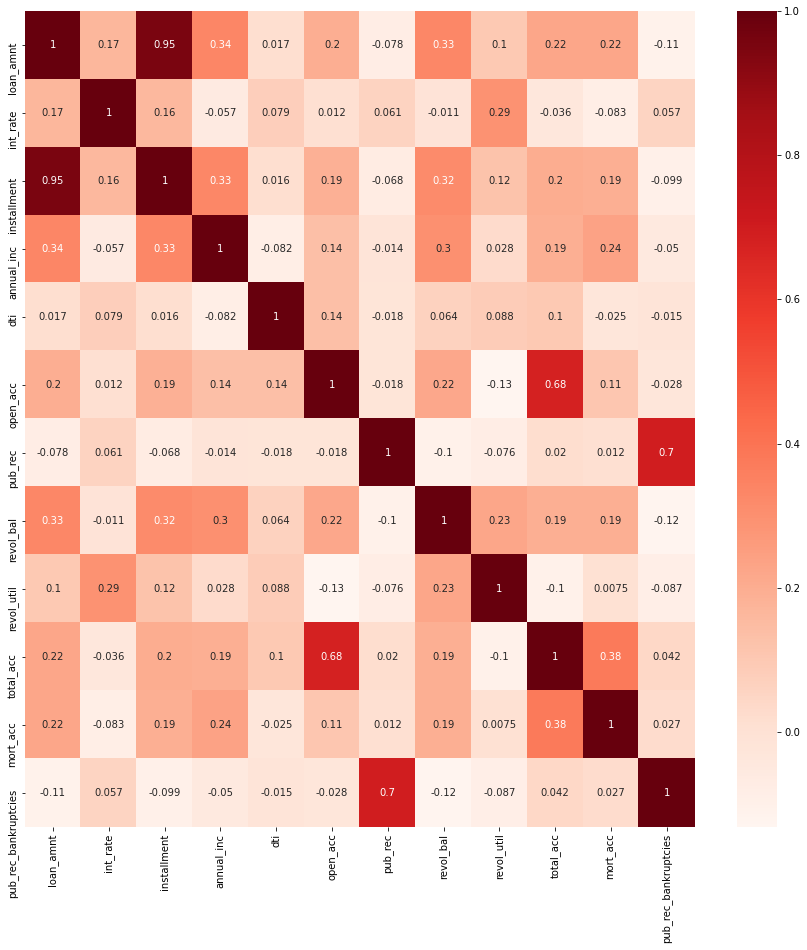

In [9]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True,cmap='Reds')
plt.show()

In [10]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [11]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,title,earliest_cr_line,initial_list_status,application_type,address
count,396030,396030,396030,373103,377729,396030,396030,396030,396030,396030,394275,396030,396030,396030,396030
unique,2,7,35,173105,11,6,3,115,2,14,48817,684,2,3,393700
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,Oct-2000,f,INDIVIDUAL,USCGC Smith\r\nFPO AE 70466
freq,302005,116018,26655,4389,126041,198348,139563,14846,318357,234507,152472,3017,238066,395319,8


In [12]:
def outliers(df):
    for ft in df.columns:
        if((df[ft].dtypes) == 'float64'):
            q1 = df[ft].quantile(0.25)
            q3 = df[ft].quantile(0.75)
            iqr = q3 - q1

            lower_bound = q1 - (1.5 * iqr)
            upper_bound = q3 + (1.5* iqr)
            df[ft] = np.where(df[ft] > upper_bound, upper_bound, np.where(df[ft] < lower_bound, lower_bound, df[ft]))
        else:
            df[ft] = df[ft]
    return df


In [13]:
df1 = df.copy(deep=True)
clean= outliers(df1)

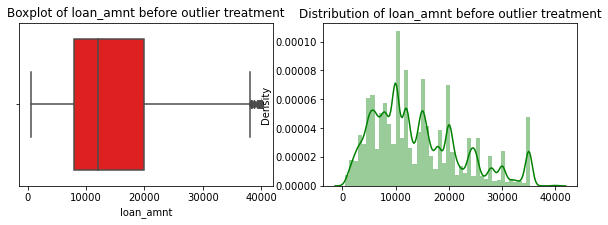

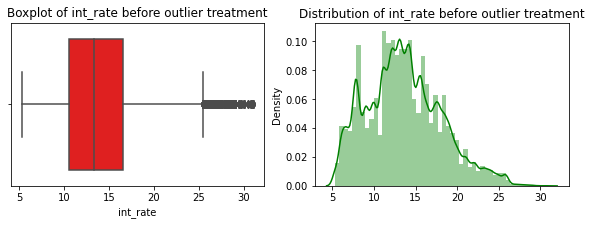

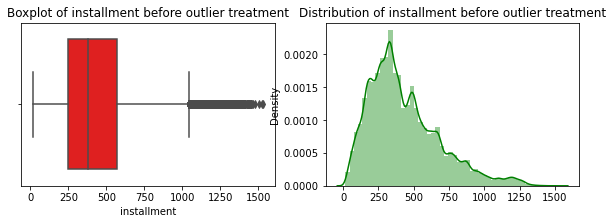

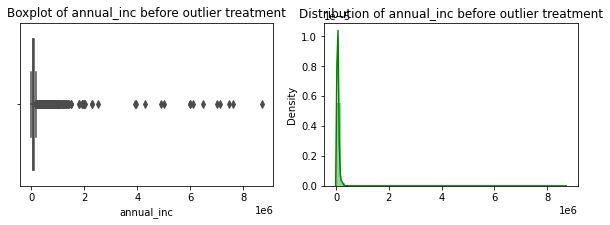

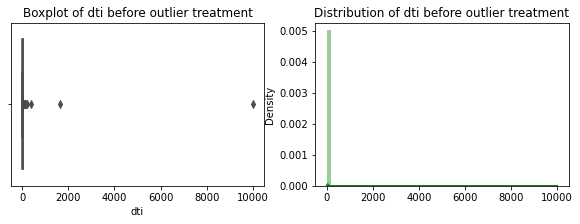

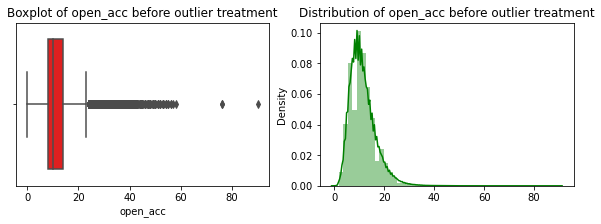

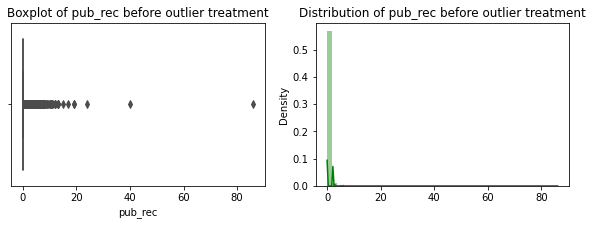

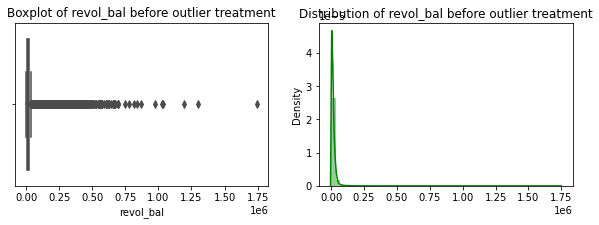

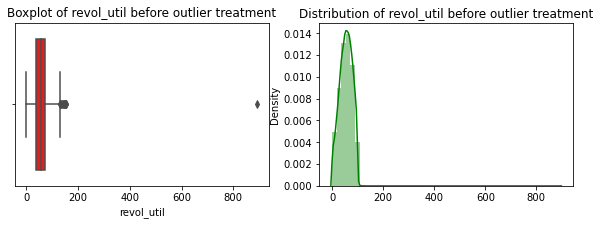

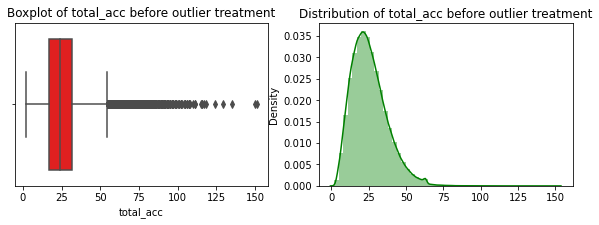

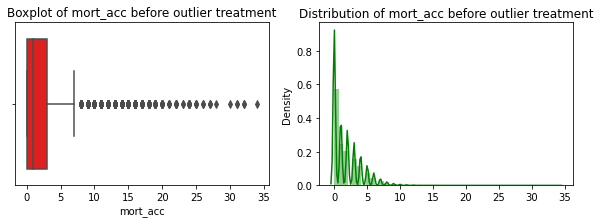

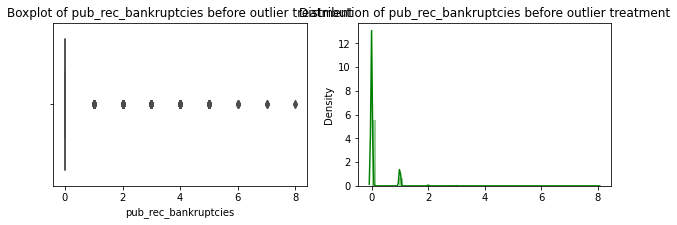

In [15]:
# outlier treatment
f1 = df.select_dtypes(include='float64')
for i in f1.columns:
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    sns.boxplot(x=df[i], color='red')
    plt.title(f"Boxplot of {i} before outlier treatment")
    plt.subplot(122)
    sns.distplot(x=df[i], color='green')
    plt.title(f"Distribution of {i} before outlier treatment")
    plt.show()

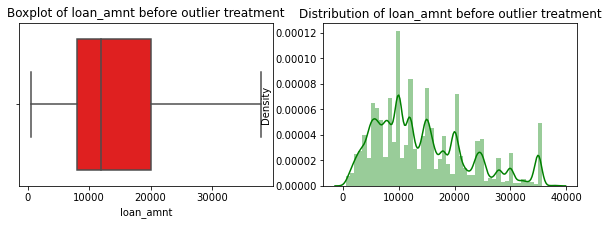

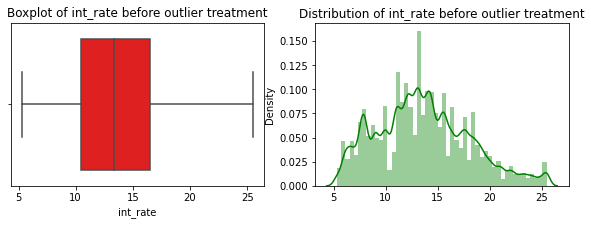

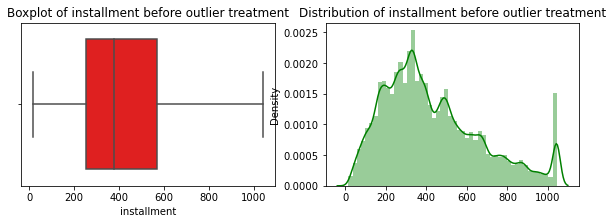

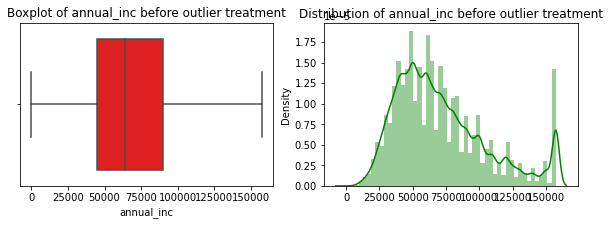

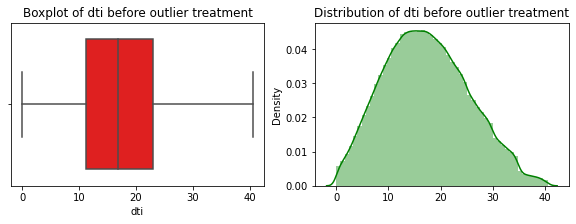

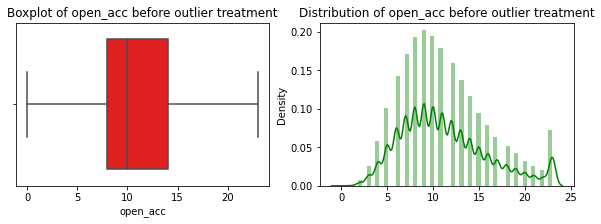

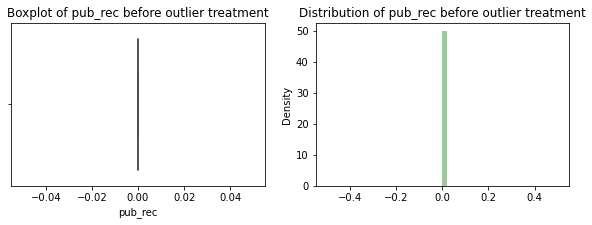

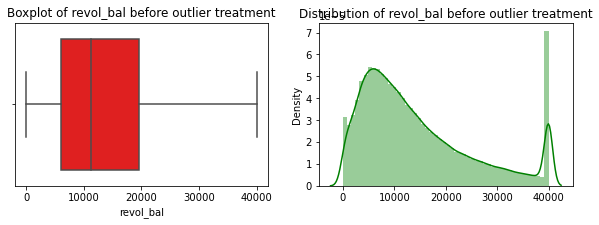

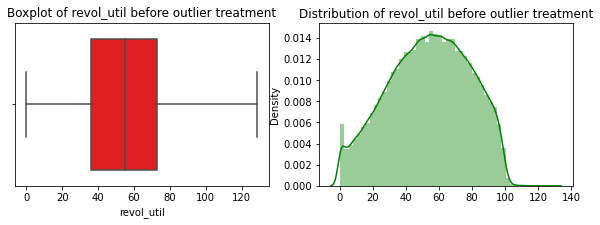

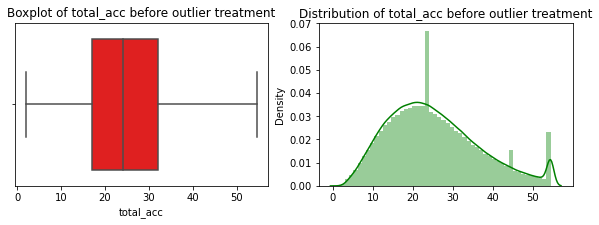

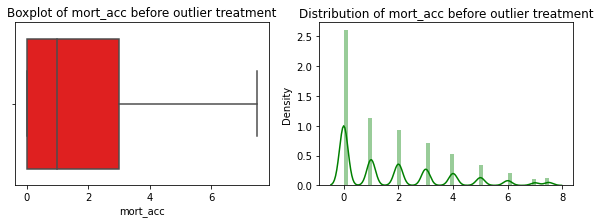

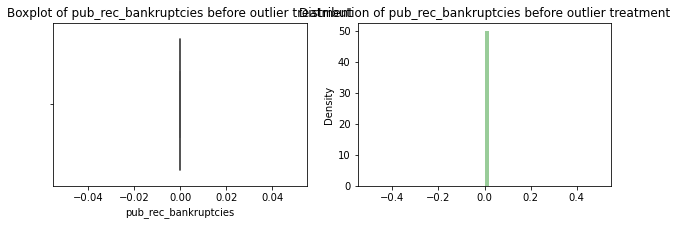

In [16]:
f2 = df1.select_dtypes(include='float64')
for i in f2:
    plt.figure(figsize=(10,3))
    plt.subplot(121)
    sns.boxplot(x=df1[i], color='red')
    plt.title(f"Boxplot of {i} before outlier treatment")
    plt.subplot(122)
    sns.distplot(x=df1[i], color='green')
    plt.title(f"Distribution of {i} before outlier treatment")
    plt.show()

# `DATA TRANSFORMATION` 

In [17]:
df['loan_status'] = df['loan_status'].map({'Fully Paid':1, 'Charged Off':0})
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [18]:
df1 = df.copy(deep=True)
target_enc = [
 'term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status',
 'issue_d', 'loan_status', 'purpose', 'title', 'earliest_cr_line',
 'initial_list_status', 'application_type', 'address'
]


In [19]:
for col in target_enc:
    from category_encoders import TargetEncoder
    TEncoder = TargetEncoder()
    df1[col] = TEncoder.fit_transform(df1[col],df1["loan_status"])
# df1['emp_title']=le.fit_transform(df1['emp_title'])

In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [21]:
from sklearn.preprocessing import OrdinalEncoder
label_grade = sorted(df1.grade.unique())[::-1]
label_sgrade = sorted(df1.sub_grade.unique())[::-1]

ord_enc = OrdinalEncoder(categories = [label_grade])
ord_enc1 = OrdinalEncoder(categories = [label_sgrade])
ord_enc.fit(df1[['grade']])
ord_enc1.fit(df1[['sub_grade']])
df1['grade'] = ord_enc.transform(df1[['grade']])
df1['sub_grade'] = ord_enc1.transform(df1[['sub_grade']])

In [22]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.842254,11.44,329.48,5.0,26.0,0.752809,0.815814,0.773378,117000.0,...,16.0,0.0,36369.0,41.8,25.0,0.799245,0.803913,0.0,0.0,0.803871
1,8000.0,0.842254,11.99,265.68,5.0,25.0,0.683022,0.807615,0.830439,65000.0,...,17.0,0.0,20131.0,53.3,27.0,0.806940,0.803913,3.0,0.0,0.803871
2,15600.0,0.842254,10.49,506.97,5.0,27.0,0.818181,0.793128,0.773378,43057.0,...,13.0,0.0,11987.0,92.2,26.0,0.806940,0.803913,0.0,0.0,0.803871
3,7200.0,0.842254,6.49,220.65,6.0,33.0,0.803871,0.810806,0.773378,54000.0,...,6.0,0.0,5472.0,21.5,13.0,0.806940,0.803913,0.0,0.0,0.803871
4,24375.0,0.680585,17.27,609.33,4.0,20.0,0.803871,0.799530,0.830439,55000.0,...,13.0,0.0,24584.0,69.8,43.0,0.806940,0.803913,1.0,0.0,0.803871


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  float64
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [24]:
# feature engineering
df1['pub_rec'] = np.where(df1['pub_rec'] != 0.0,1,0)
df1['mort_acc'] = np.where(df1['pub_rec'] != 0.0,1,0)
df1['pub_rec_bankruptcies'] = np.where(df1['pub_rec'] != 0.0,1,0)
print(df1['pub_rec'].value_counts())
print(df1['mort_acc'].value_counts())
print(df1['pub_rec_bankruptcies'].value_counts())

0    338272
1     57758
Name: pub_rec, dtype: int64
0    338272
1     57758
Name: mort_acc, dtype: int64
0    338272
1     57758
Name: pub_rec_bankruptcies, dtype: int64


In [25]:
df1.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,0.842254,11.44,329.48,5.0,26.0,0.752809,0.815814,0.773378,117000.0,...,16.0,0,36369.0,41.8,25.0,0.799245,0.803913,0,0,0.803871
1,8000.0,0.842254,11.99,265.68,5.0,25.0,0.683022,0.807615,0.830439,65000.0,...,17.0,0,20131.0,53.3,27.0,0.806940,0.803913,0,0,0.803871
2,15600.0,0.842254,10.49,506.97,5.0,27.0,0.818181,0.793128,0.773378,43057.0,...,13.0,0,11987.0,92.2,26.0,0.806940,0.803913,0,0,0.803871
3,7200.0,0.842254,6.49,220.65,6.0,33.0,0.803871,0.810806,0.773378,54000.0,...,6.0,0,5472.0,21.5,13.0,0.806940,0.803913,0,0,0.803871
4,24375.0,0.680585,17.27,609.33,4.0,20.0,0.803871,0.799530,0.830439,55000.0,...,13.0,0,24584.0,69.8,43.0,0.806940,0.803913,0,0,0.803871


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  float64
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  float64
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  float64
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  float64
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [27]:
df1.drop(columns='address',inplace=True)

In [28]:
df1.dropna(how='any', axis=0,inplace = True)

In [29]:
df1.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

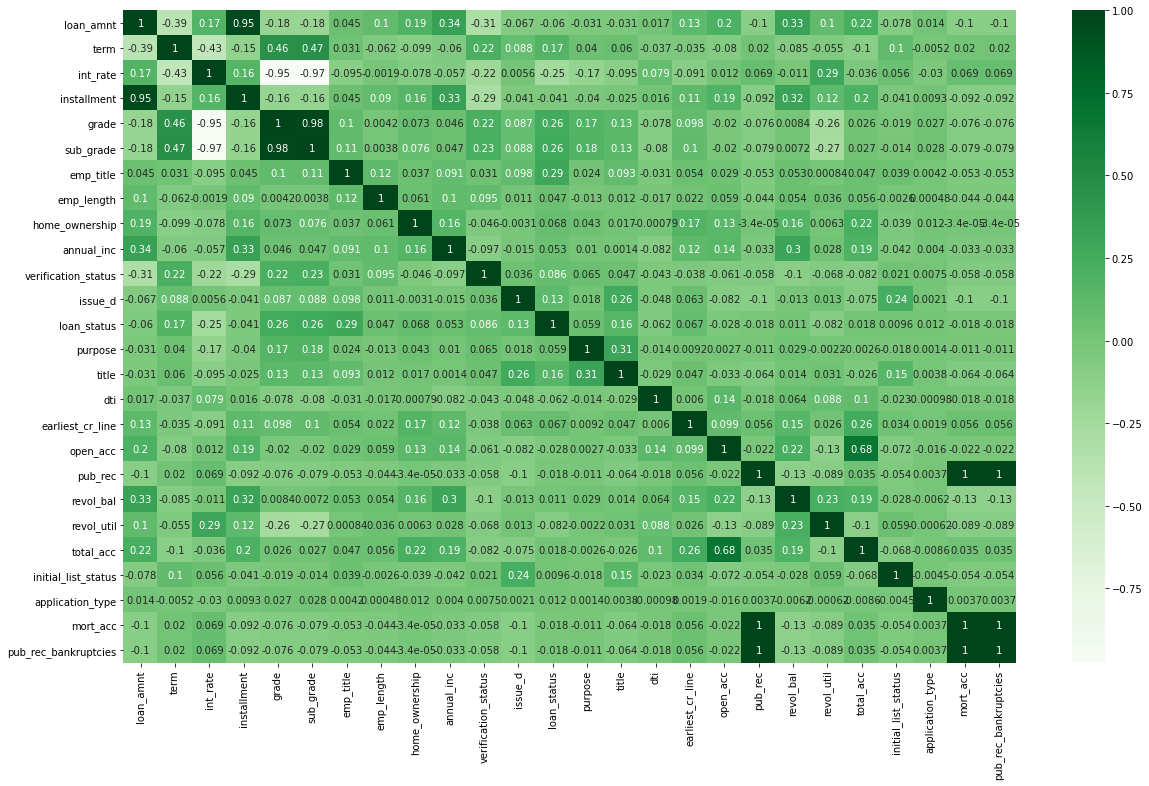

In [30]:
corr = df1.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

# `LOGISTIC REGRESSION`

In [31]:
X = df1.drop(columns=['loan_status'])
y = df1['loan_status']
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state =42)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [33]:
scaler.fit(X_train)
scaler.fit(x_test)

StandardScaler()

In [34]:
X_train = scaler.transform(X_train)
x_test = scaler.transform(x_test)
# X_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state =42,)

In [35]:
model1 = LogisticRegression(C=0.01,penalty='l2')
model1.fit(X_train,y_train)

LogisticRegression(C=0.01)

In [36]:
y_pred1 = model1.predict(x_test)
proba1 = model1.predict_proba(x_test)[:,1]

Accuracy of the Training dataset : 0.8205662263967051
Accuracy of the Test dataset : 0.8210769243727206
Accuracy Score :  0.8210769243727206 



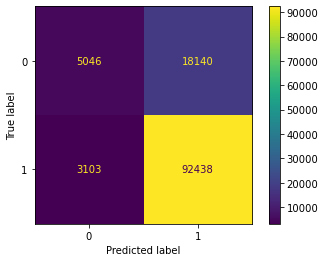

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
print('Accuracy of the Training dataset :',model1.score(X_train,y_train))
print('Accuracy of the Test dataset :',model1.score(x_test,y_test))
print('Accuracy Score : ',accuracy_score(y_test,y_pred1),'\n')
cm1 = confusion_matrix(y_test, y_pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model1.classes_)
disp.plot()
plt.show()

In [38]:
coef1 = model1.coef_
values = []
for i in X.columns:
    values.append(i)
# print(len(values))
pos = coef1[0].reshape(-1,1)
values = np.array(values).reshape(-1,1)
# print(len(pos))

weight1 = pd.DataFrame(np.concatenate((values,pos),axis=1),columns=['feature','coef'])
weight1['coef']= weight1['coef'].astype('float')

weight1.sort_values(by=['coef'], inplace=True,ascending=False)
weight1

,feature,coef
6,emp_title,0.688916
13,title,0.337017
1,term,0.231078
11,issue_d,0.207800
5,sub_grade,0.205739
8,home_ownership,0.144054
9,annual_inc,0.121009
20,total_acc,0.101437
15,earliest_cr_line,0.064105
7,emp_length,0.059838


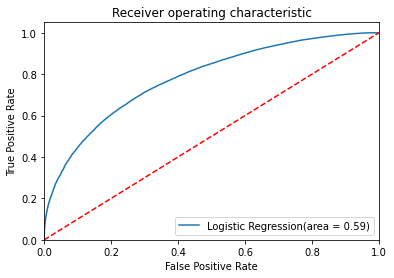

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, proba1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression(area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### 97% recall means that 97% of the borrowers that would pay back the loan are approved by our system. 

## `LOGISTIC REGRESSION AFTER DROPPING` 
## `FEATURES HAVING MULTICOLLINEARITY`

In [43]:
X = df1.drop(columns=['loan_status','loan_amnt','mort_acc', 'pub_rec_bankruptcies','installment','sub_grade','int_rate','grade','purpose'])
y = df1['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state =42)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train)
scaler1.fit(X_test)
X_train = scaler1.transform(X_train)
X_test = scaler1.transform(X_test)

In [47]:
model2 = LogisticRegression(C=0.01,max_iter=500,penalty='l2')
model2.fit(X_train,y_train)

LogisticRegression(C=0.01, max_iter=500)

In [48]:
y_pred2 = model2.predict(X_test)

In [49]:
print('Accuracy of the Training dataset :',model2.score(X_train,y_train))
print('Accuracy of the Test dataset :',model2.score(X_test,y_test))
print('Accuracy Score : ',accuracy_score(y_test,y_pred2),'\n')

Accuracy of the Training dataset : 0.818422031065564
Accuracy of the Test dataset : 0.8190807482712441
Accuracy Score :  0.8190807482712441 



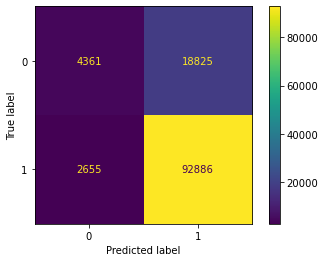

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm2 = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model2.classes_)
disp.plot()
plt.show()

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [52]:
lr1 = LogisticRegression()
forest_params = [{'C':[1,0.1,0.001,0.001],'max_iter':[100,1000,100]}]

clf = GridSearchCV(lr1, forest_params, cv = 10, scoring='precision')

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid=[{'C': [1, 0.1, 0.001, 0.001],
                          'max_iter': [100, 1000, 100]}],
             scoring='precision')

In [53]:
clf.best_params_

{'C': 1, 'max_iter': 100}

In [54]:
model3 = LogisticRegression(C=1,max_iter=100,penalty='l2')
model3.fit(X_train,y_train)

LogisticRegression(C=1)

In [56]:
y_pred3 = model3.predict(X_test)
proba3 = model3.predict_proba(X_test)[:,1]

Accuracy of the Training dataset : 0.8184184213091142
Accuracy of the Test dataset : 0.8190133667994643
Accuracy Score :  0.8190133667994643 



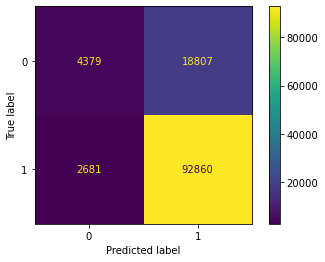

In [57]:
print('Accuracy of the Training dataset :',model3.score(X_train,y_train))
print('Accuracy of the Test dataset :',model3.score(X_test,y_test))
print('Accuracy Score : ',accuracy_score(y_test,y_pred3),'\n')
cm3= confusion_matrix(y_test, y_pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=model3.classes_)
disp.plot()
plt.show()

In [58]:
coef3 = model3.coef_
values = []
for i in X.columns:
    values.append(i)
# print(len(values))
pos = coef3[0].reshape(-1,1)
values = np.array(values).reshape(-1,1)
# print(len(pos))

weight3 = pd.DataFrame(np.concatenate((values,pos),axis=1),columns=['feature','coef'])
weight3['coef']= weight3['coef'].astype('float')

weight3.sort_values(by=['coef'], inplace=True,ascending=False)
weight3

,feature,coef
1,emp_title,0.699052
0,term,0.397155
7,title,0.353374
6,issue_d,0.195183
3,home_ownership,0.167340
14,total_acc,0.126105
5,verification_status,0.110062
9,earliest_cr_line,0.095835
4,annual_inc,0.094017
12,revol_bal,0.073491


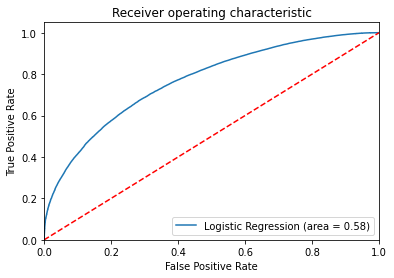

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
logit_roc_auc = roc_auc_score(y_test, y_pred3)
fpr, tpr, thresholds = roc_curve(y_test, proba3)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

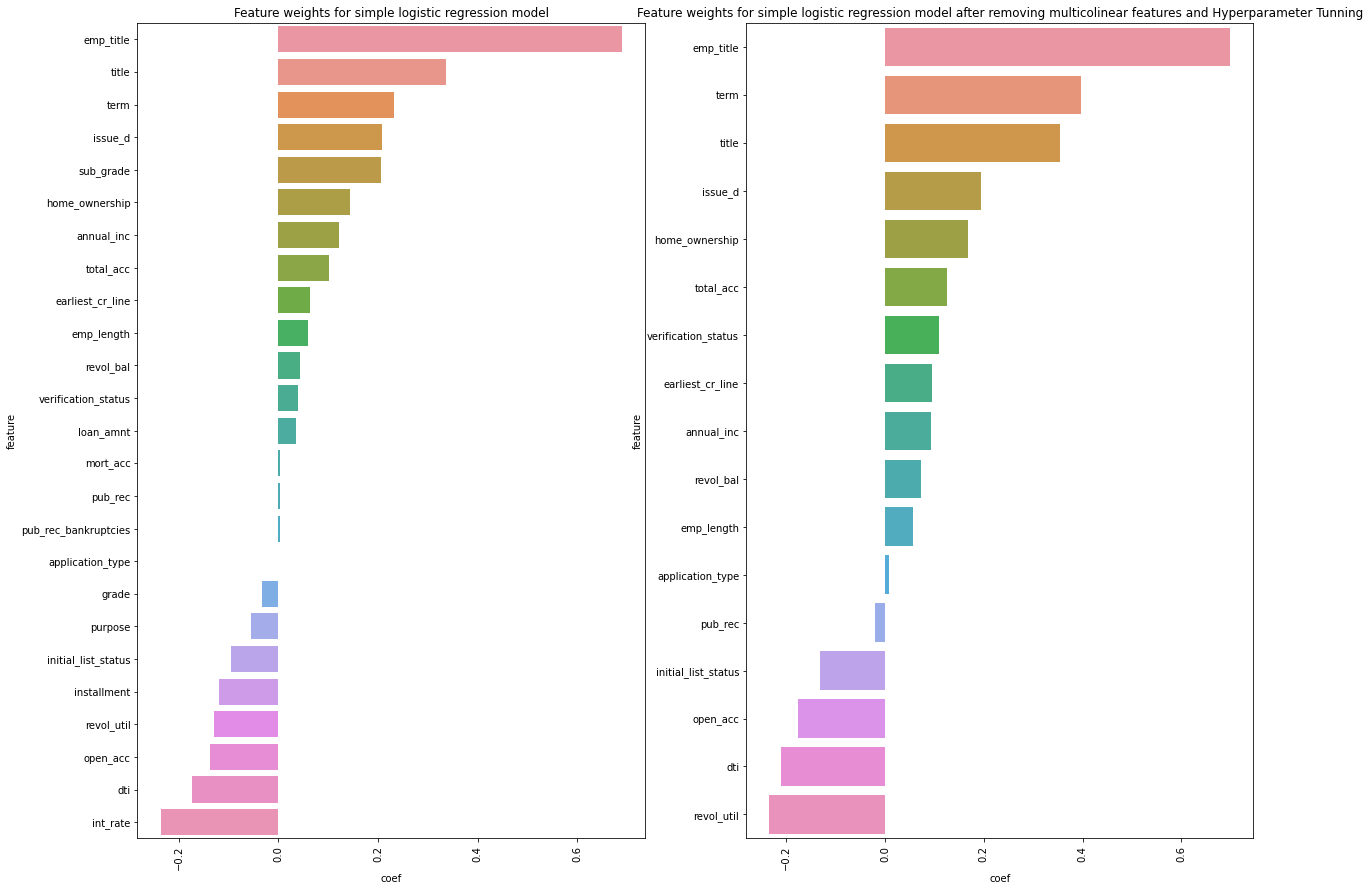

In [60]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1,2,1)
sns.barplot(x=weight1.coef,y=weight1.feature)
plt.title('Feature weights for simple logistic regression model')
plt.xticks(rotation=90)

ax = fig.add_subplot(1,2,2)
sns.barplot(x=weight3.coef,y=weight3.feature)
plt.xticks(rotation=90)
plt.title('Feature weights for simple logistic regression model after removing multicolinear features and Hyperparameter Tunning')
# plt.grid()
plt.show()

# ``LOGISTIC REGRESSION USING OVERSAMPLING TECHNIQUE``

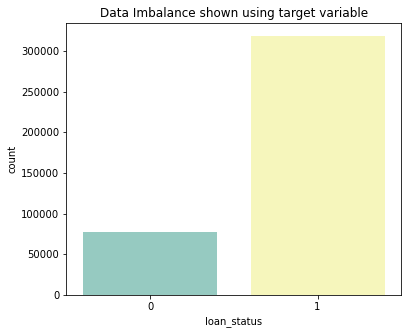

In [61]:
plt.figure(figsize=(6,5))
sns.countplot(df.loan_status,palette='Set3')
plt.title('Data Imbalance shown using target variable')
plt.show()

In [66]:
X = df1.drop(columns=['loan_status','loan_amnt','mort_acc', 'pub_rec_bankruptcies','installment','sub_grade','int_rate','grade','purpose'])
y = df1['loan_status']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

In [70]:
from imblearn.over_sampling import SMOTE
SmoteBL = SMOTE(k_neighbors=5)
X_smote , y_smote = SmoteBL.fit_resample(X_train,y_train)

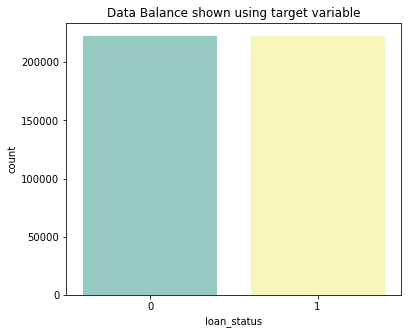

In [71]:
plt.figure(figsize=(6,5))
sns.countplot(y_smo,palette='Set3')
plt.title('Data Balance shown using target variable')
plt.show()

In [72]:
LogReg = LogisticRegression(max_iter=500,class_weight="balanced")
LogReg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=500)

In [88]:
LogReg.score(X_train,y_train)

0.5235771242514268

In [73]:
LogReg.score(X_test,y_test)

0.5202270755598979

In [74]:
LogReg.coef_

array([[ 1.07960448e-03,  1.86897425e-03,  4.98158785e-04,
         5.33677033e-04,  4.44232072e-06,  6.21258514e-04,
         7.92626667e-04,  9.03159161e-04, -2.64609384e-02,
         5.39978409e-04, -5.88592377e-03, -2.77641603e-04,
         1.48544516e-06, -2.35238065e-03,  1.12191974e-02,
         4.68395325e-04,  4.68057625e-04]])

In [87]:
print(f'Confusion Matrix:')
print(confusion_matrix(y_test, LogReg.predict(X_test)))
print(f'Precision Score:',precision_score(y_test ,LogReg.predict(X_test)))
print(f'Recall Score:',recall_score(y_test ,LogReg.predict(X_test)))

Confusion Matrix:
[[15352  7834]
 [49128 46413]]
Precision Score: 0.8555864840452007
Recall Score: 0.48579144032404936


In [78]:
coef4 = LogReg.coef_
values = []
for i in X.columns:
    values.append(i)
# print(len(values))
pos = coef4[0].reshape(-1,1)
values = np.array(values).reshape(-1,1)
# print(len(pos))

weight4 = pd.DataFrame(np.concatenate((values,pos),axis=1),columns=['feature','coef'])
weight4['coef']= weight4['coef'].astype('float')

weight4.sort_values(by=['coef'], inplace=True,ascending=False)
weight4

,feature,coef
14,total_acc,0.011219
1,emp_title,0.001869
0,term,0.001080
7,title,0.000903
6,issue_d,0.000793
5,verification_status,0.000621
9,earliest_cr_line,0.000540
3,home_ownership,0.000534
2,emp_length,0.000498
15,initial_list_status,0.000468


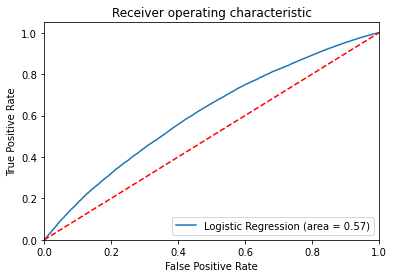

In [79]:
logit_roc_auc = roc_auc_score(y_test, LogReg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test,LogReg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Feature weights for simple logistic regression model after Oversampling Technique')

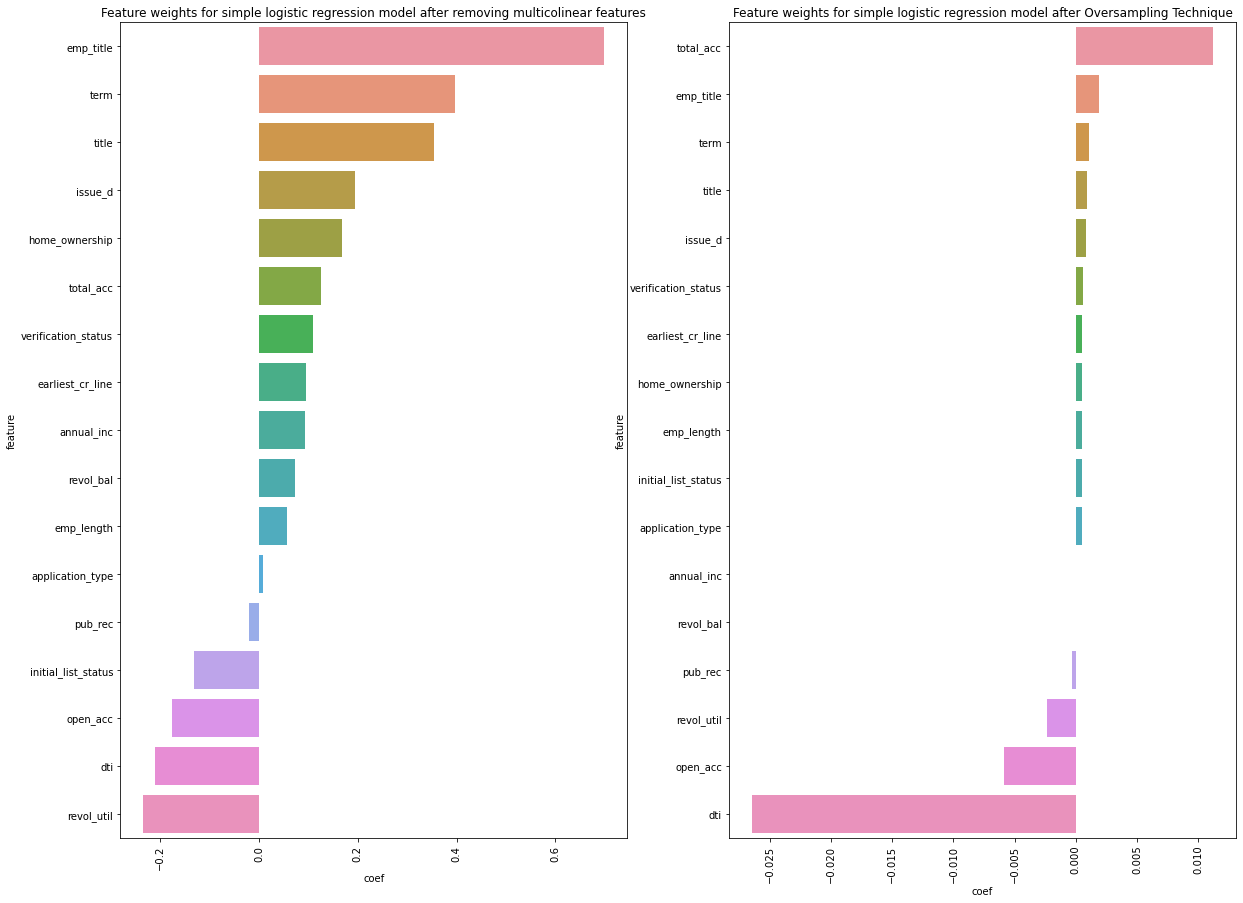

In [81]:
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(1,2,1)
sns.barplot(x=weight3.coef,y=weight3.feature)
plt.xticks(rotation=90)
plt.title('Feature weights for simple logistic regression model after removing multicolinear features')

ax = fig.add_subplot(1,2,2)
sns.barplot(x=weight4.coef,y=weight4.feature)
plt.xticks(rotation=90)
plt.title('Feature weights for simple logistic regression model after Oversampling Technique')


## `Recommendations:`
- Loantap should focus on betterment of low grade loans as probability of paying back G grade loans are approximately 55 %, one out of two loans are going to get charged off. 
- Loantap should specially keep track on the loans that has high interest paying loans as there are 40% chance to make a default. 
- Also loantap should promote low interest loans as much as possible as probability of paying back the loans are above 90%.
- Loantap should promote joint loans as much as possible as it has the highest probability of getting fully paid among all categories. As there are high numbers of public derogatory records the chances of making default increases, thus loantap should avoid paying loans to such user